In [102]:
import pandas as pd

# Scikit learn

from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [54]:
df = pd.read_csv('Titanic.csv')

In [55]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [56]:
df.shape

(891, 10)

In [57]:
df.isna().mean()*100

sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.224467
class        0.000000
who          0.000000
alone        0.000000
survived     0.000000
dtype: float64

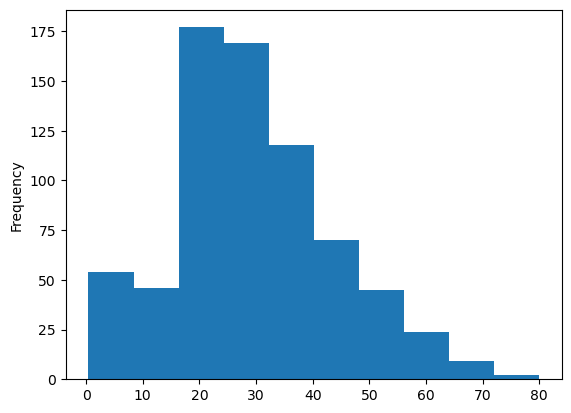

In [58]:
df.age.plot(kind='hist');

In [59]:
df.age.mean()

29.69911764705882

In [61]:
df['embarked'] = df['embarked'].fillna(value=df.embarked.value_counts().index[0])
df['age'] = df['age'].fillna(value=df.age.mean())

In [62]:
df.isna().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

In [63]:
df['survived'].value_counts(normalize=True) *100

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [64]:
df.groupby(['sex','survived']).survived.count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

In [65]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [66]:
# sex_dict = {'male':0, 'female':1}

# df['sex'].map(sex_dict)

In [67]:
les = LabelEncoder()

df['sex'] = les.fit_transform(df['sex'])

In [68]:
# les.inverse_transform(df.sex)

In [69]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,1,22.0,1,0,7.2500,S,Third,man,False,0
1,0,38.0,1,0,71.2833,C,First,woman,False,1
2,0,26.0,0,0,7.9250,S,Third,woman,True,1
3,0,35.0,1,0,53.1000,S,First,woman,False,1
4,1,35.0,0,0,8.0500,S,Third,man,True,0


In [70]:
df.embarked.value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [72]:
df[['embarked_q','embarked_s']] = pd.get_dummies(df['embarked'], drop_first=True)

In [73]:
# ohe_e = OneHotEncoder()
# # df['embarked'] = 
# # 
# ohe_e.fit_transform(df['embarked'])

In [74]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,embarked_q,embarked_s
0,1,22.0,1,0,7.2500,S,Third,man,False,0,0,1
1,0,38.0,1,0,71.2833,C,First,woman,False,1,0,0
2,0,26.0,0,0,7.9250,S,Third,woman,True,1,0,1
3,0,35.0,1,0,53.1000,S,First,woman,False,1,0,1
4,1,35.0,0,0,8.0500,S,Third,man,True,0,0,1


In [78]:
# df['class'].nunique()

df['class'].unique()

clss = {'Third':3, 'First':1, 'Second':2}

df['class'] = df['class'].map(clss)


In [79]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,embarked_q,embarked_s
0,1,22.0,1,0,7.2500,S,3,man,False,0,0,1
1,0,38.0,1,0,71.2833,C,1,woman,False,1,0,0
2,0,26.0,0,0,7.9250,S,3,woman,True,1,0,1
3,0,35.0,1,0,53.1000,S,1,woman,False,1,0,1
4,1,35.0,0,0,8.0500,S,3,man,True,0,0,1


In [81]:
df['alone'] = df.alone.astype(int)

In [82]:
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,embarked_q,embarked_s
0,1,22.000000,1,0,7.2500,S,3,man,0,0,0,1
1,0,38.000000,1,0,71.2833,C,1,woman,0,1,0,0
2,0,26.000000,0,0,7.9250,S,3,woman,1,1,0,1
3,0,35.000000,1,0,53.1000,S,1,woman,0,1,0,1
4,1,35.000000,0,0,8.0500,S,3,man,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.000000,0,0,13.0000,S,2,man,1,0,0,1
887,0,19.000000,0,0,30.0000,S,1,woman,1,1,0,1
888,0,29.699118,1,2,23.4500,S,3,woman,0,0,0,1
889,1,26.000000,0,0,30.0000,C,1,man,1,1,0,0


In [ ]:
# training, testing, validation

# 70%      20%         10%

In [84]:
X_columns = ['sex', 'age', 'sibsp', 'parch', 'fare', 'class','alone', 'embarked_q', 'embarked_s']
X_columns



['sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'class',
 'alone',
 'embarked_q',
 'embarked_s']

In [87]:
X = df[X_columns]
y = df['survived'].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [91]:
X_train.shape, X_test.shape

((623, 9), (268, 9))

In [93]:
y_train.shape, y_test.shape

((623,), (268,))

In [109]:
model = LogisticRegression( n_jobs=2, max_iter=500)

In [110]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500, n_jobs=2)

In [101]:
y_pred = model.predict(X_test)

In [111]:
y_pred2 = model.predict(X_test)

In [104]:
accuracy_score(y_test, y_pred) *100

80.22388059701493

In [112]:
accuracy_score(y_test, y_pred2) *100

80.59701492537313

In [105]:
confusion_matrix(y_test, y_pred)

array([[135,  22],
       [ 31,  80]])

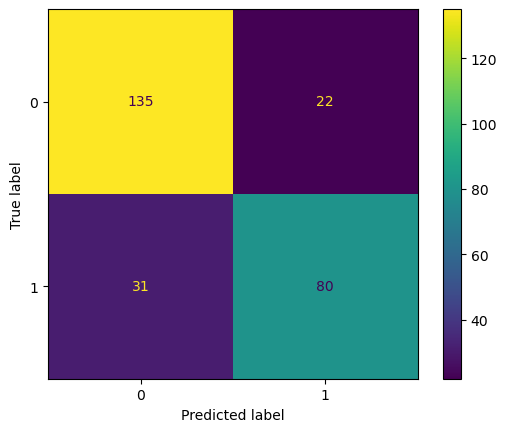

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.show()

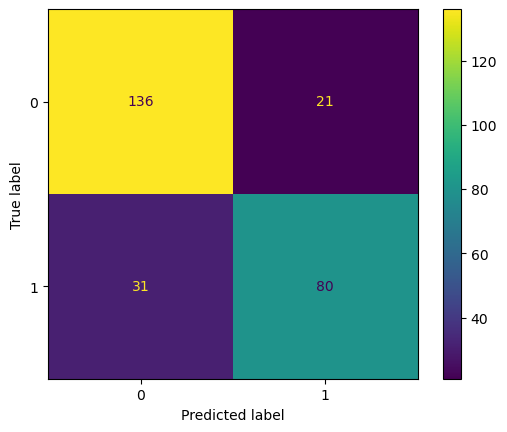

In [113]:



cm = confusion_matrix(y_test, y_pred2, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.show()